<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import keras
#from sklearn.datasets import make_circles
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [4]:

X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

<Axes: >

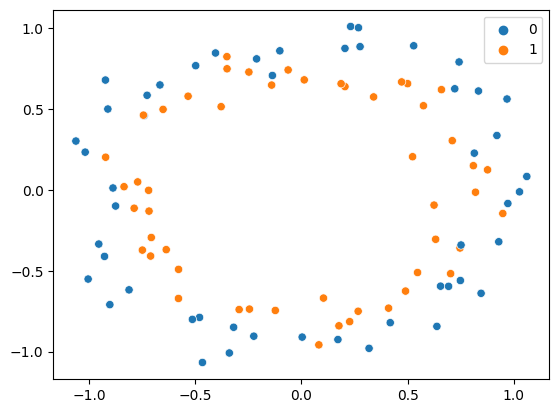

In [10]:

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [11]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile( optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=0,epochs=1000)

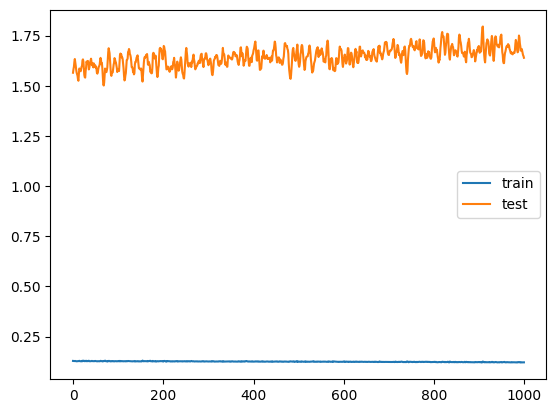

In [42]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()# we can see that loss is incresing with number of epochs.thats why we use early stopping.

In [43]:
model=Sequential()
model.add(Dense(256,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile( optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss', min_delta=0.00001,patience=20,verbose=1,mode='auto', restore_best_weights='False')

In [54]:
history=model.fit(X_train,y_train,epochs=3500,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 61ms/step - loss: 0.3428 - accuracy: 0.9000 - val_loss: 0.6383 - val_accuracy: 0.7000
Epoch 2/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.3421 - accuracy: 0.8875 - val_loss: 0.6394 - val_accuracy: 0.7000
Epoch 3/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.3423 - accuracy: 0.8875 - val_loss: 0.6455 - val_accuracy: 0.7000
Epoch 4/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.3422 - accuracy: 0.8875 - val_loss: 0.6380 - val_accuracy: 0.7000
Epoch 5/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.3408 - accuracy: 0.8875 - val_loss: 0.6384 - val_accuracy: 0.7000
Epoch 6/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.3402 - accuracy: 0.8875 - val_loss: 0.6377 - val_accuracy: 0.7000
Epoch 7/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.3398 - accuracy: 0.8875 - val_loss: 0.6386 - val_accuracy: 0.7000
Epoch 8/3500


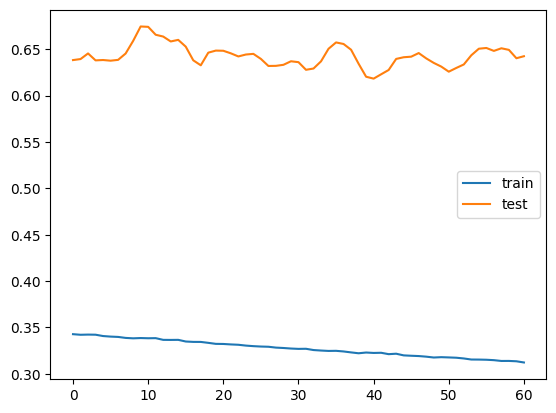

In [55]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()